---
title: "2023_Kronensicherung_Plesse_Analyse_Kraft"
author: "Kyell Jensen"
date: "2024-08-06"
format: pdf
editor: visual
---

# 2023_Kronensicherung_Plesse_Analyse_Kraft

## Kombinierte Analyse LineScale3, TreeQinetic und Versuchsaufzeichung

Nutze eine geeignete Python 3.11 Umgebung (z. B. virtuelle Environment).

## Arbeitsumgebung vorbereiten

Nutze gemeinsame imports.py für alle Analysen-Notebooks.
Erstelle Instanzen für Config und PlotManager.
Lade Dateinamen.

In [5]:
CONFIG = CoreConfig(working_directory=f"{working_directory}/combined")
PLOT_MANAGER = PlotManager(CONFIG)
# CONFIG
# PLOT_MANAGER

## IMPORT: Daten Import

Lege Pfade für Daten-Importe, Daten-Exporte etc. fest (ggf. anpassen an eigene Verzeichnisstruktur), ausgelagert in gemeinsame Config für verschiedene Notebooks

In [7]:
# Dateien laden


## ANALYSE: Explorative Datenanalyse

In [8]:
df.head(10)

,id,rope_datetime,treatment,release_force_target,rope_release,cable_max,sensor_name,location,direction,height,...,frequency_damped,phase_angle,y_shift,x_shift,frequency_undamped,damping_ratio,metrics_warning,pearson_r,nrmse,nmae
4,2,2022-03-23 11:24:23,free,2.8,2.72310,NaN,Elasto(90),StB,elongation,16.55,...,0.441518,0.200000,-5.287164,0.116641,0.442936,0.503994,False,0.943158,0.038866,0.018011
5,2,2022-03-23 11:24:23,free,2.8,2.72310,NaN,Elasto(92),StB,elongation,11.6,...,0.432441,-0.200000,-14.233644,-0.009730,0.436601,0.873595,False,0.929554,0.034560,0.016183
6,2,2022-03-23 11:24:23,free,2.8,2.72310,NaN,Elasto(95),StA,elongation,11.6,...,0.422702,-0.200000,-19.011309,-0.123043,0.426319,0.823807,False,0.908058,0.044873,0.024274
7,2,2022-03-23 11:24:23,free,2.8,2.72310,NaN,Elasto(98),StA,elongation,16.85,...,0.443529,-0.065967,-1.099515,0.118608,0.445993,0.663224,False,0.980663,0.029621,0.021087
8,3,2022-03-23 11:31:12,free,2.8,2.76205,NaN,Elasto(90),StB,elongation,16.55,...,0.440653,0.200000,7.775284,0.097887,0.441317,0.344951,False,0.957380,0.043035,0.018619
9,3,2022-03-23 11:31:12,free,2.8,2.76205,NaN,Elasto(92),StB,elongation,11.6,...,0.439321,-0.075771,7.052210,0.094719,0.441380,0.608931,False,0.933463,0.043534,0.021255
10,3,2022-03-23 11:31:12,free,2.8,2.76205,NaN,Elasto(95),StA,elongation,11.6,...,0.436023,-0.200000,-3.785755,-0.075741,0.438127,0.618021,False,0.938307,0.039020,0.022498
11,3,2022-03-23 11:31:12,free,2.8,2.76205,NaN,Elasto(98),StA,elongation,16.85,...,0.441350,-0.200000,-17.747289,-0.203345,0.442888,0.525070,False,0.974139,0.028693,0.020715
12,4,2022-03-23 11:54:33,free,2.8,2.73950,NaN,Elasto(90),StB,elongation,16.55,...,0.439065,0.200000,-23.445975,0.120929,0.439764,0.354677,False,0.945320,0.049764,0.021509
13,4,2022-03-23 11:54:33,free,2.8,2.73950,NaN,Elasto(92),StB,elongation,11.6,...,0.436850,-0.200000,-19.454720,0.061912,0.438829,0.598701,False,0.922665,0.050822,0.020659


In [9]:
df.columns

Index(['id', 'rope_datetime', 'treatment', 'release_force_target',
       'rope_release', 'cable_max', 'sensor_name', 'location', 'direction',
       'height', 'diameter', 'max_strain', 'max_compression', 'm_amplitude',
       'm_amplitude_2', 'initial_amplitude', 'damping_coeff',
       'frequency_damped', 'phase_angle', 'y_shift', 'x_shift',
       'frequency_undamped', 'damping_ratio', 'metrics_warning', 'pearson_r',
       'nrmse', 'nmae'],
      dtype='object')

### COMBINED: Definition von Darstellungsstandards
Festlegen von Farbcodes für einheitliche Darstellung von Sensoren und Behandlungsvarianten für alle nachfolgenden Plots.

In [10]:
color_palette = PLOT_MANAGER.color_palette_list

# Für die Spalte "treatment":
treatment_color_dict = get_color_dict(df, "treatment", PLOT_MANAGER.color_palette_list)

Index(['free', 'gefa_dynamic', 'cobra_static'], dtype='object')


### LS3 ANALYSE: Zusammenhang Vorspannung und Lastspitze KS

In [11]:
# Funktion zur Erstellung des Text-Strings für die statistischen Parameter
def annotate_stats(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    text_str = f"R = {r_value:.2f}\nSlope = {slope:.2f}\nIntercept = {intercept:.2f}\np-value = {p_value:.2e}\nStd Err = {std_err:.2f}"
    return text_str

In [12]:
df_grouped_by_id = df[['id', 'treatment', 'release_force_target', 'rope_release', 'cable_max']]
df_grouped_by_id = df_grouped_by_id.groupby(['id'], observed=False).first().reset_index()
df_grouped_by_id

,id,treatment,release_force_target,rope_release,cable_max
0,2,free,2.8,2.72310,NaN
1,3,free,2.8,2.76205,NaN
2,4,free,2.8,2.73950,NaN
3,5,free,2.4,2.36475,NaN
4,6,free,2.4,2.38000,NaN
5,7,free,2.4,2.36920,NaN
6,8,free,2.0,1.96440,NaN
7,9,free,2.0,1.97830,NaN
8,10,free,2.0,1.94680,NaN
9,11,gefa_dynamic,2.8,2.75785,1.48


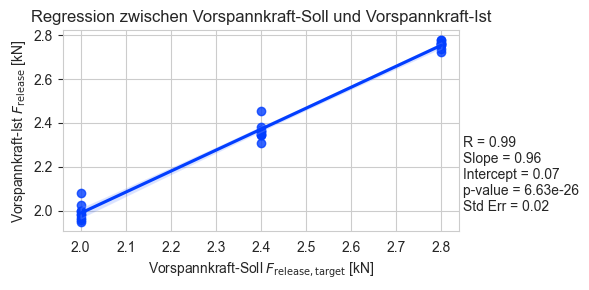

In [13]:
data_df = df_grouped_by_id
x_var = 'release_force_target'
y_var = 'rope_release'

fig, ax1 = plt.subplots(figsize=(6, 3))
sns.regplot(data=data_df, x=x_var, y=y_var, ax=ax1, ci=95)
ax2 = ax1.twinx()
ax2.axis('off')
stats_text = annotate_stats(data_df[x_var], data_df[y_var])
ax2.annotate(stats_text, xy=(1.01, 0.1), xycoords='axes fraction')
ax1.set_title(f'Regression zwischen {get_label_from_dict(x_var, data_dict)} und {get_label_from_dict(y_var, data_dict)}')
ax1.set_xlabel(get_label_from_dict(x_var, data_dict, use_full=True))
ax1.set_ylabel(get_label_from_dict(y_var, data_dict, use_full=True))
plt.tight_layout()
plt.show()
PLOT_MANAGER.save_plot(fig, filename=f"{x_var}_vs_{y_var}", subdir="ls3_regression")

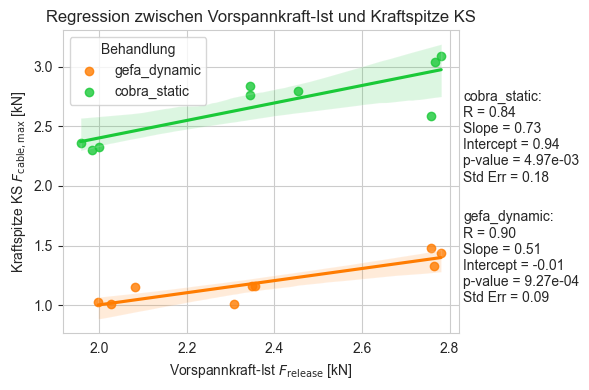

In [14]:
data_df = df_grouped_by_id
group_by = 'treatment'
x_var = 'rope_release'
y_var = 'cable_max'

fig, ax1 = plt.subplots(figsize=(6, 4))
ax2 = ax1.twinx()
ax2.axis('off')
y_pos_init = 0.1
for idx, (group, color) in enumerate(treatment_color_dict.items()):
    group_df = df_grouped_by_id[df_grouped_by_id[group_by] == group]
    if group_df['cable_max'].isna().all():
        continue
    sns.regplot(x='rope_release', y='cable_max', data=group_df, ax=ax1, color=color, label=group, ci=95)
    stats_text = annotate_stats(group_df[x_var], group_df[y_var])
    ax2.annotate(f"{group}:\n{stats_text}", xy=(1.01, y_pos_init + ((idx - 1) * 0.4)), xycoords='axes fraction')
ax1.set_title(f'Regression zwischen {get_label_from_dict(x_var, data_dict)} und {get_label_from_dict(y_var, data_dict)}')
ax1.set_xlabel(get_label_from_dict(x_var, data_dict, use_full=True))
ax1.set_ylabel(get_label_from_dict(y_var, data_dict, use_full=True))
ax1.legend(title=get_label_from_dict(group_by, data_dict), loc='upper left')
plt.tight_layout()
plt.show()
PLOT_MANAGER.save_plot(fig, filename=f"{x_var}_vs_{y_var}", subdir="ls3_regression")

### LS3 ANALYSE: Lastspitze in der KS

Analyse der Spitzenlasten in der KS gruppiert nach Ziel-Vorspannung und Treatment.

In [15]:
# Daten filtern
filtered_df = df.query('treatment in ["gefa_dynamic", "cobra_static"]')[["release_force_target", "treatment", "cable_max"]]

# Gruppieren, Aggregieren und Pivotieren
pivoted = (
    filtered_df
    .groupby(['release_force_target', 'treatment'], observed=True)['cable_max']
    .agg(['min', 'mean', 'max'])
    .unstack(level=0)
    .swaplevel(axis=1)
    .sort_index(axis=1, level=[0, 1], ascending=[True, False])
)

# Spaltennamen formatieren (Index Level 0: zwei Nachkommastellen)
pivoted.columns = pd.MultiIndex.from_tuples(
    [(f"{lvl0:.2f}", lvl1) if isinstance(lvl0, float) else (lvl0, lvl1)
     for lvl0, lvl1 in pivoted.columns],
    names=pivoted.columns.names
)
pivoted

release_force_target  2.00                  2.40              2.80            \
                       min      mean   max   min  mean   max   min      mean   
treatment                                                                      
gefa_dynamic          1.01  1.063333  1.15  1.01  1.11  1.16  1.33  1.416667   
cobra_static          2.30  2.330000  2.36  2.76  2.80  2.84  2.59  2.906667   

release_force_target        
                       max  
treatment                   
gefa_dynamic          1.48  
cobra_static          3.09

In [16]:
# Achsenbeschriftungen setzen
pivoted.columns.set_names(
    [get_label_from_dict("release_force_target", data_dict, template="{Zeichen}"), None],
    inplace=True
)
pivoted.index.set_names(
    get_label_from_dict("treatment", data_dict),
    inplace=True
)

In [17]:
latex_string = pivoted.to_latex(index=True, escape=True, float_format="{:0.2f}".format, column_format="l|rrr|rrr|rrr", multicolumn=True,
    multicolumn_format="c")

# Beschriftung erstellen
caption = "Feldversuch 2 - Ergebnisse, Kraftspitze in der KS"
caption_long = (
    f"Feldversuch 2 - {get_label_from_dict('cable_max', data_dict, use_full=True)} "
    f"gruppiert über {get_label_from_dict('release_force_target', data_dict, use_full=True)} und "
    f"{get_label_from_dict('treatment', data_dict)}. "
    f"Angegeben ist jeweils pro Gruppe das Minimum, der Mittelwert und das Maximum. "
    f"Die Variante 'free' ist nicht aufgeführt, da hier keine KS eingesetzt wurde."
)

# LaTeX-Tabelle speichern
save_latex_table(latex_string, caption, latex_export_directory, caption_long)

Content saved to: C:\kyellsen\005_Projekte\2024_BA\032_Feldversuch_2023_Plesse\030_Analysen\2023_Kronensicherung_Plesse_Kraefte_Schwingungen\working_directory\export_latex\feldversuch_2_ergebnisse_kraftspitze_in_der_ks.tex
